In [632]:
import pandas as pd
import plotly.graph_objects as go


In [871]:
df=pd.read_csv("SAMPLE-ESTMA-data.csv" , thousands=',')
#df=pd.read_csv("test_file.csv" , thousands=',')

In [872]:
entity_list = df["entity"].unique()

In [873]:
df['period_start_date'] = pd.to_datetime(df['period_start_date'])
#df['amount_reported_cad'] = df['amount_reported_cad'].str.replace(',', '')
pd.to_numeric(df['amount_reported_cad'])
#df['amount_reported_cad']= df['amount_reported_cad'].astype(float)
df.set_index("entity", inplace=True)
df.head()

,estma_id,jurisdiction,period_start_date,period_end_date,reporting_cylce,country,payee_project_name,payee_or_project,payment_category,amount_reported_cad,web_Link,type_of_report,payment_notes
entity,,,,,,,,,,,,,
Rochester Resources Ltd.,E001568,Canada,2016-06-01,2017-05-30,2016,Mexico,GENERAL MINING DIRECTION OF THE SECRETARIAT OF...,payee,Fees,217444.04,https://www.dropbox.com/s/qh3p9uj615ryv4u/RCT ...,Individual Report,NaN
Rochester Resources Ltd.,E001568,Canada,2016-06-01,2017-05-30,2016,Mexico,Government of Mexico,payee,Fees,2075.80,https://www.dropbox.com/s/qh3p9uj615ryv4u/RCT ...,Individual Report,Corporate tax instalments royalty payments W...
Rochester Resources Ltd.,E001568,Canada,2016-06-01,2017-05-30,2016,Mexico,MEXICAN SOCIAL SECURITY INSTITUTE,payee,Taxes,466428.68,https://www.dropbox.com/s/qh3p9uj615ryv4u/RCT ...,Individual Report,NaN
Rochester Resources Ltd.,E001568,Canada,2016-06-01,2017-05-30,2016,Mexico,Estanzuela,project,Fees,49299.97,https://www.dropbox.com/s/qh3p9uj615ryv4u/RCT ...,Individual Report,Royalties - Includes $208 236 of paid-in-kind ...
Rochester Resources Ltd.,E001568,Canada,2016-06-01,2017-05-30,2016,Mexico,Estanzuela,project,Taxes,348070.57,https://www.dropbox.com/s/qh3p9uj615ryv4u/RCT ...,Individual Report,Alberta Boiler Association Alberta Energy Albe...


In [896]:
frames= {}
for entity in entity_list:
    data=df.loc[[entity], ['reporting_cylce','payment_category', 'amount_reported_cad']]
    d=data.groupby(["reporting_cylce","payment_category"])["amount_reported_cad"].sum()
    data_frame=d.to_frame().reset_index()
    frames[entity] = data_frame 

test=frames['Turquoise Hill Resources Ltd']
test.loc[test['payment_category']=='Fees']

,reporting_cylce,payment_category,amount_reported_cad
1,2016,Fees,24765212.0
5,2017,Fees,22595640.0
9,2018,Fees,21569600.0
13,2019,Fees,22654560.0


In [918]:
def entity(entity_name):
    data=df.loc[[entity_name], ['reporting_cylce','payment_category', 'amount_reported_cad']]
    d=data.groupby(["reporting_cylce","payment_category"])["amount_reported_cad"].sum()
    data_frame=d.to_frame().reset_index()
    payment_types= data_frame['payment_category'].unique()
    return data_frame,payment_types

In [919]:
entity('Turquoise Hill Resources Ltd')

(    reporting_cylce payment_category  amount_reported_cad
 0              2016          Bonuses           18055160.0
 1              2016             Fees           24765212.0
 2              2016        Royalties          106121224.0
 3              2016            Taxes          181252248.0
 4              2017          Bonuses           12752252.0
 5              2017             Fees           22595640.0
 6              2017        Royalties          139989080.0
 7              2017            Taxes           20284132.0
 8              2018          Bonuses           13600000.0
 9              2018             Fees           21569600.0
 10             2018        Royalties          178241600.0
 11             2018            Taxes           18251200.0
 12             2019          Bonuses           12990000.0
 13             2019             Fees           22654560.0
 14             2019        Royalties          184639860.0
 15             2019            Taxes           18809520

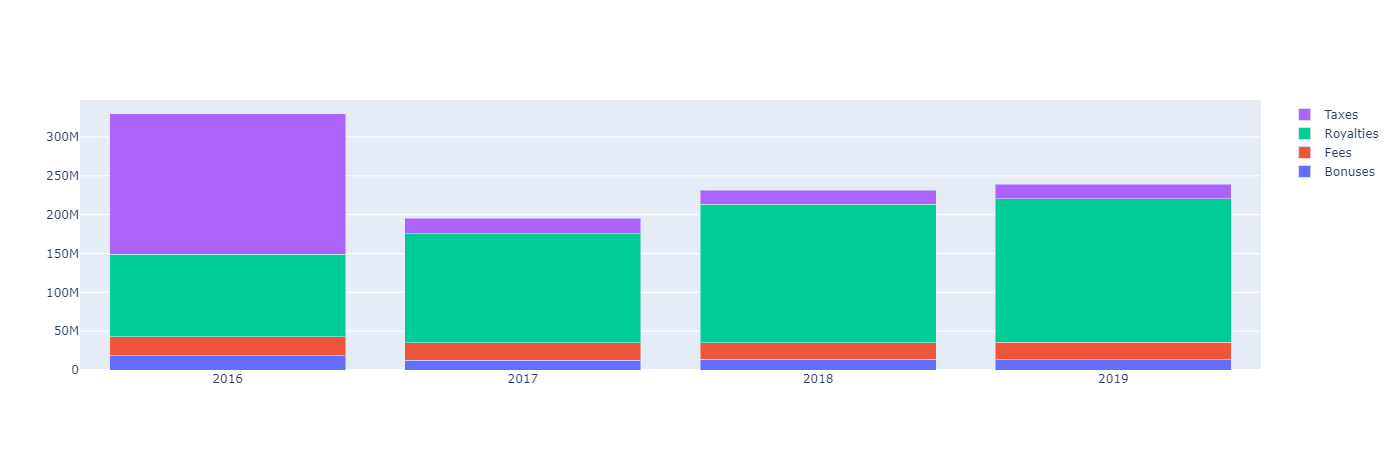

In [882]:
import plotly.graph_objects as go

p=[]
for name in payment_types:
    frame=data_frame.loc[data_frame['payment_category']==name]
    p.append(go.Bar(name=name, x=frame['reporting_cylce'], y=frame['amount_reported_cad']))

    
    
fig = go.Figure(data=p)
default_entity=entity_list[0]


fig.update_layout(barmode='stack')
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.update_yaxes(autorange=True)
fig.show()


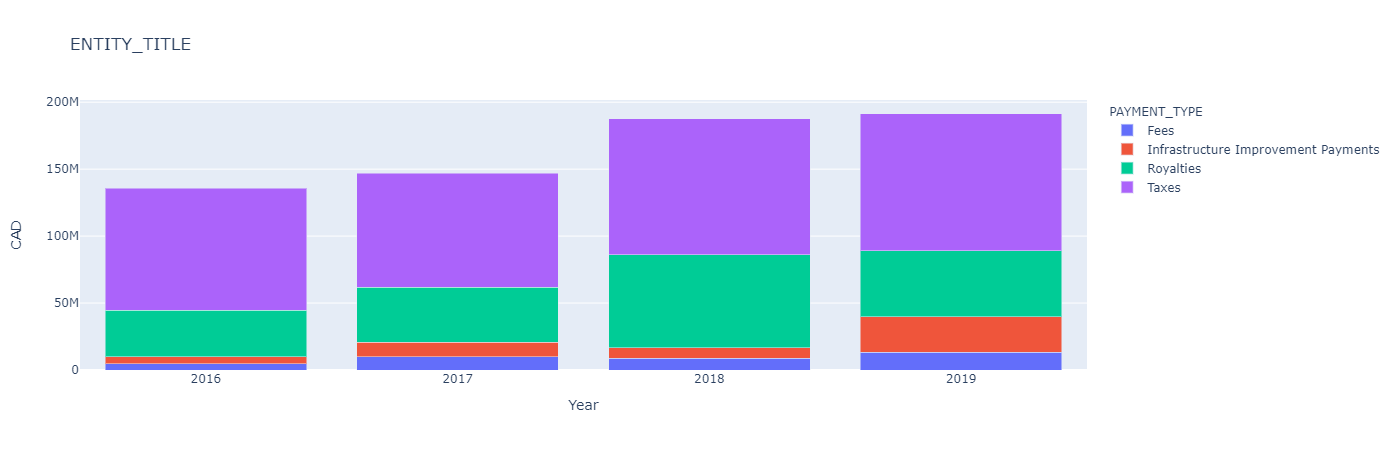

In [901]:
# import plotly.express as px
# import plotly.graph_objects as go

# fig = px.bar(data_frame, x="reporting_cylce", y="amount_reported_cad", color="payment_category", title="ENTITY_TITLE",orientation='v', 
#              labels= {
#                 "reporting_cylce": "Year",
#                 "amount_reported_cad": "CAD",
#                 "payment_category" : "PAYMENT_TYPE"
#             })


# fig.update_layout(barmode='stack')

# fig.update_xaxes(type='category')
# fig.update_xaxes(categoryorder='category ascending')
# fig.update_yaxes(autorange=True)

# fig.show()

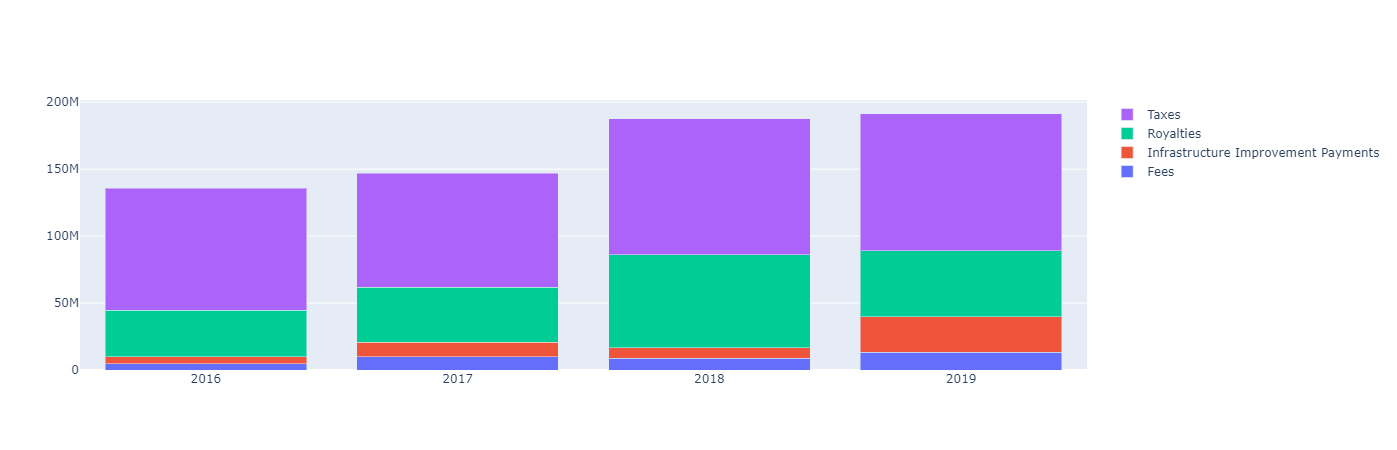

In [923]:
import plotly.graph_objects as go

p=[]
for name in payment_types:
    frame=data_frame.loc[data_frame['payment_category']==name]
    p.append(go.Bar(name=name, x=frame['reporting_cylce'], y=frame['amount_reported_cad']))

    
    
fig = go.Figure(data=p)
default_entity=entity_list[0]


fig.update_layout(barmode='stack')
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.update_yaxes(autorange=True)
fig.show()

In [ ]:
import plotly.graph_objects as go


    
#fig = go.Figure(data=p)
fig=go.Figure()
default_state="Rochester Resources Ltd."
p=[]
buttons=[]
region_plot_names = []

for entity_name in entity_list:
    data_frame, payment_types = entity(entity_name)
    for name in payment_types:
        frame=data_frame.loc[data_frame['payment_category']==name]
        #p.append(go.Bar(name=name, x=frame['reporting_cylce'], y=frame['amount_reported_cad']))
        fig.add_trace(
            go.Bar(name=name, x=frame['reporting_cylce'], y=frame['amount_reported_cad'])
        )
        
    region_plot_names.extend([entity_name]*2)
    
for region_name in entity_list:
    buttons.append(dict(method='update',
                        label=region_name,
                        args = [{'visible': [region_name==r for r in region_plot_names]}]))
      

fig.update_layout(showlegend=False, updatemenus=[{"buttons": buttons, "direction": "down",  "showactive": True, "x": 0.5, "y": 1.15}])

# for name in payment_types:
#     frame=data_frame.loc[data_frame['payment_category']==name]
#     p.append(go.Bar(name=name, x=frame['reporting_cylce'], y=frame['amount_reported_cad']))
# fig = go.Figure(data=p)


# default_entity=entity_list[0]


        




fig.update_layout(barmode='stack')
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.update_yaxes(autorange=True)
fig.show()


In [694]:
fig.write_html("file.html")
